In [2]:
### R code from vignette source 'viper.Rnw'

###################################################
### code chunk number 1: viper.Rnw:68-73 (eval = FALSE)
###################################################
## if (!requireNamespace("BiocManager", quietly=TRUE))
##     install.packages("BiocManager")
## BiocManager::install("mixtools")
## BiocManager::install("bcellViper")
## BiocManager::install("viper")


###################################################
### code chunk number 2: viper.Rnw:79-80
###################################################
require(viper)


In [3]:

###################################################
### code chunk number 3: viper.Rnw:95-98
###################################################
data(bcellViper, package="bcellViper")
adjfile <- system.file("aracne", "bcellaracne.adj", package = "bcellViper")
regul <- aracne2regulon(adjfile, dset, verbose = FALSE)


number of iterations= 301 


In [22]:
class(dset)

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

In [4]:
###################################################
### code chunk number 4: viper.Rnw:100-101
###################################################
print(regul)


Object of class regulon with 20 regulators, 3758 targets and 6013 interactions


In [20]:
str(regul)

List of 20
 $ AATF  :List of 2
  ..$ tfmode    : Named num [1:488] 0.999 0.999 0.999 0.998 0.989 ...
  .. ..- attr(*, "names")= chr [1:488] "SAMM50" "DRG1" "ATIC" "SMARCC1" ...
  ..$ likelihood: num [1:488] 0.998 0.997 0.996 0.995 0.995 ...
 $ ADNP  :List of 2
  ..$ tfmode    : Named num [1:309] 0.999 1 0.997 0.999 0.999 ...
  .. ..- attr(*, "names")= chr [1:309] "GTF2H1" "PARG" "DCP2" "ZZZ3" ...
  ..$ likelihood: num [1:309] 0.999 0.998 0.998 0.997 0.997 ...
 $ ADNP2 :List of 2
  ..$ tfmode    : Named num [1:214] 0.944 0.989 0.974 0.859 0.905 ...
  .. ..- attr(*, "names")= chr [1:214] "AMD1" "CLP1" "SERPINB9" "PITPNB" ...
  ..$ likelihood: num [1:214] 0.968 0.961 0.947 0.942 0.941 ...
 $ AEBP1 :List of 2
  ..$ tfmode    : Named num [1:356] 0.989 0.998 0.999 0.995 0.96 ...
  .. ..- attr(*, "names")= chr [1:356] "PTRF" "PECAM1" "FCGRT" "TAGLN" ...
  ..$ likelihood: num [1:356] 0.996 0.991 0.99 0.99 0.989 ...
 $ AFF3  :List of 2
  ..$ tfmode    : Named num [1:215] 0.995 0.997 0.994 0.996

In [7]:
###################################################
### code chunk number 5: viper.Rnw:118-119
###################################################
signature <- rowTtest(dset, "description", c("CB", "CC"), "N")
str(signature)

List of 2
 $ statistic: num [1:6249, 1] 10.937 0.99 -0.228 -0.522 2.666 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6249] "ADA" "CDH2" "MED6" "NR2E3" ...
  .. ..$ : NULL
 $ p.value  : num [1:6249, 1] 6.30e-08 3.40e-01 8.23e-01 6.10e-01 1.94e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6249] "ADA" "CDH2" "MED6" "NR2E3" ...
  .. ..$ : NULL


In [8]:

###################################################
### code chunk number 6: viper.Rnw:125-127
###################################################
signature <- (qnorm(signature$p.value/2, lower.tail = FALSE) * 
                sign(signature$statistic))[, 1]

In [9]:
###################################################
### code chunk number 7: viper.Rnw:135-137
###################################################
nullmodel <- ttestNull(dset, "description", c("CB", "CC"), "N", per = 1000,
                       repos = TRUE, verbose = FALSE)


In [10]:
###################################################
### code chunk number 8: viper.Rnw:145-146
###################################################
regulon


Object of class regulon with 621 regulators, 6249 targets and 172240 interactions

In [11]:
###################################################
### code chunk number 9: viper.Rnw:151-152
###################################################
mrs <- msviper(signature, regulon, nullmodel, verbose = FALSE)


###################################################
### code chunk number 10: viper.Rnw:157-158
###################################################
summary(mrs)


,Regulon,Size,NES,p.value,FDR
MYBL1,MYBL1,251,4.24,2.20e-05,0.00493
NR2F6,NR2F6,223,4.12,3.81e-05,0.00493
MEF2B,MEF2B,228,4.07,4.76e-05,0.00493
BCL6,BCL6,401,3.95,7.74e-05,0.00577
E2F2,E2F2,214,3.95,7.92e-05,0.00577
TOP2A,TOP2A,749,3.91,9.25e-05,0.00577
SMAD5,SMAD5,195,3.91,9.35e-05,0.00577
KLF4,KLF4,255,-4.07,4.65e-05,0.00493
KLF9,KLF9,337,-4.11,4.03e-05,0.00493
TBL1X,TBL1X,256,-4.37,1.22e-05,0.00493


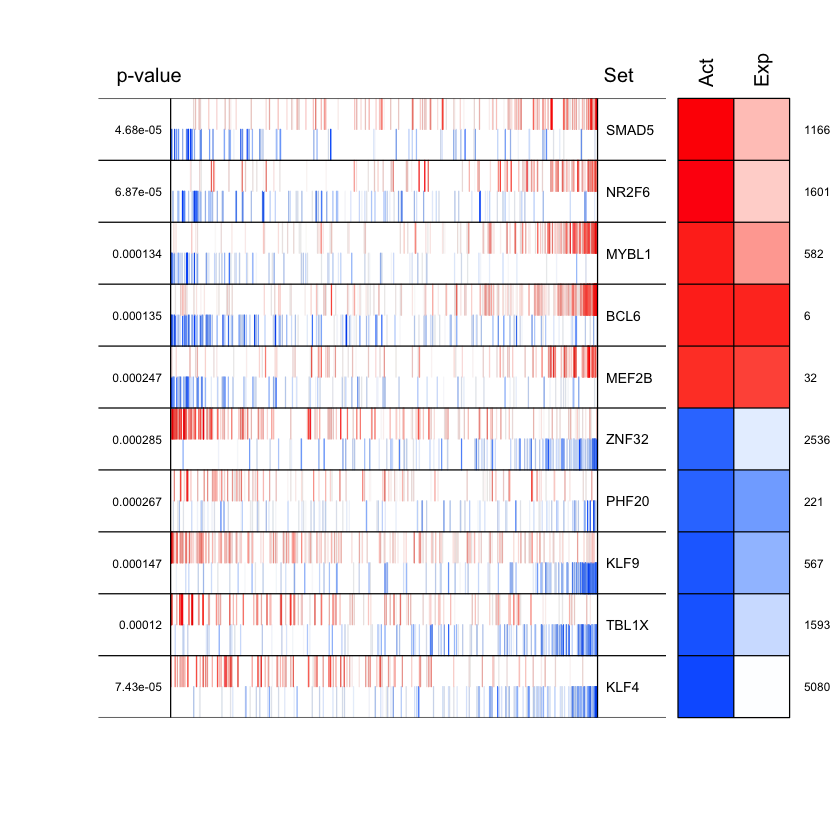

In [13]:
###################################################
### code chunk number 11: msviper
###################################################
plot(mrs, cex = .7)


In [15]:
## Leading-Edge Analysis
data(bcellViper, package="bcellViper")
sig <- rowTtest(dset, "description", "CB", "N")$statistic
mra <- msviper(sig, regulon)
mra <- ledge(mra)
summary(mra)

Computing regulon enrichment with aREA algorithm


  |======================================================================| 100%

,Regulon,Size,NES,p.value,FDR,Ledge
TOP2A,TOP2A,749,27.46,4.68e-166,2.90e-163,"ACADM, TNFSF8, BCL6, TERF2, + 444 genes"
PTTG1,PTTG1,503,21.01,4.88e-98,1.01e-95,"P2RY10, PTPRK, CD44, BCL6, + 286 genes"
HNRNPAB,HNRNPAB,655,20.36,3.92e-92,4.86e-90,"TRAF3IP3, EXT1, CCR6, TRIP13, + 343 genes"
TFAM,TFAM,731,19.03,1.05e-80,9.30e-79,"CD44, BCL6, SRSF1, GINS1, + 380 genes"
HDGF,HDGF,568,17.96,3.71e-72,2.30e-70,"P2RY10, SMARCA4, TRAF3IP3, TGFBR2, + 283 genes"
NR1D2,NR1D2,259,-18.20,5.58e-74,3.85e-72,"TMX4, BBS9, ACOT13, LRRC42, + 149 genes"
ZMYND11,ZMYND11,452,-18.27,1.41e-74,1.09e-72,"HAUS5, SDHC, DGUOK, DENND5A, + 234 genes"
JUND,JUND,627,-19.04,8.24e-81,8.53e-79,"AGFG2, GTF2F2, PSMD8, LYN, + 327 genes"
FOXJ2,FOXJ2,379,-20.78,6.08e-96,9.44e-94,"SEC61B, SPG11, EP400, ELOVL5, + 218 genes"
PHF1,PHF1,641,-21.86,6.92e-106,2.15e-103,"PSMA3, PDCD2, CNPPD1, ISLR, + 346 genes"


In [16]:
str(mrs)

List of 6
 $ signature: num [1:6249, 1:100] 5.32 1.31 -1.25 -1 3.55 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6249] "ADA" "CDH2" "MED6" "NR2E3" ...
  .. ..$ : chr [1:100] "1" "2" "3" "4" ...
 $ regulon  :List of 621
  ..$ AATF   :List of 2
  .. ..$ tfmode    : Named num [1:488] 0.997 0.997 0.991 0.983 0.965 ...
  .. .. ..- attr(*, "names")= chr [1:488] "SAMM50" "DRG1" "ATIC" "SMARCC1" ...
  .. ..$ likelihood: num [1:488] 0.998 0.997 0.996 0.995 0.995 ...
  ..$ ADNP   :List of 2
  .. ..$ tfmode    : Named num [1:309] 0.992 0.997 0.993 0.99 0.996 ...
  .. .. ..- attr(*, "names")= chr [1:309] "GTF2H1" "PARG" "DCP2" "ZZZ3" ...
  .. ..$ likelihood: num [1:309] 0.999 0.998 0.998 0.997 0.997 ...
  ..$ ADNP2  :List of 2
  .. ..$ tfmode    : Named num [1:214] 0.932 0.945 0.838 0.649 0.813 ...
  .. .. ..- attr(*, "names")= chr [1:214] "AMD1" "CLP1" "SERPINB9" "PITPNB" ...
  .. ..$ likelihood: num [1:214] 0.968 0.961 0.947 0.942 0.941 ...
  ..$ AEBP1  :List of 2
  .. ..$ tfmode   

In [17]:
# ### code chunk number 12: viper.Rnw:180-182
###################################################
mrs <- ledge(mrs)
summary(mrs)

,Regulon,Size,NES,p.value,FDR,Ledge
SMAD5,SMAD5,195,4.07,4.68e-05,0.0131,"UBE2J1, ENTPD1, PRPSAP2, PDE8A, + 66 genes"
NR2F6,NR2F6,223,3.98,6.87e-05,0.0131,"FGFR1OP, TRIP13, GINS1, SEC14L1, + 110 genes"
MYBL1,MYBL1,251,3.82,1.34e-04,0.0131,"UBE2J1, VNN2, BCL6, FANCA, + 145 genes"
BCL6,BCL6,401,3.82,1.35e-04,0.0131,"UBE2J1, SLC25A5, VNN2, MYC, + 225 genes"
MEF2B,MEF2B,228,3.66,2.47e-04,0.0163,"UBE2J1, VNN2, ENTPD1, SMARCA4, + 93 genes"
ZNF32,ZNF32,291,-3.63,2.85e-04,0.0163,"SCN1B, TCEAL1, DENND5A, ETFB, + 128 genes"
PHF20,PHF20,201,-3.65,2.67e-04,0.0163,"PRUNE2, AMOTL2, PUM1, RPP38, + 83 genes"
KLF9,KLF9,337,-3.80,1.47e-04,0.0131,"CRIM1, DCBLD2, IDH3B, STOM, + 159 genes"
TBL1X,TBL1X,256,-3.85,1.20e-04,0.0131,"GFRA3, VPS52, VDAC3, SCO2, + 134 genes"
KLF4,KLF4,255,-3.96,7.43e-05,0.0131,"CRAT, POLG, PHYHIP, SLC39A8, + 116 genes"


In [18]:

###################################################
### code chunk number 13: viper.Rnw:192-194
###################################################
signature <- bootstrapTtest(dset, "description", c("CB", "CC"), "N", verbose = FALSE)
mrs <- msviper(signature, regulon, nullmodel, verbose = FALSE)
summary(mrs)

,Regulon,Size,NES,p.value,FDR
MYBL1,MYBL1,251,3.79,1.48e-04,0.0207
NR2F6,NR2F6,223,3.78,1.58e-04,0.0207
BCL6,BCL6,401,3.68,2.33e-04,0.0207
TOP2A,TOP2A,749,3.62,2.95e-04,0.0207
MEF2B,MEF2B,228,3.60,3.24e-04,0.0207
MYBL2,MYBL2,240,3.52,4.27e-04,0.0207
PHF20,PHF20,201,-3.53,4.18e-04,0.0207
KLF4,KLF4,255,-3.59,3.32e-04,0.0207
KLF9,KLF9,337,-3.73,1.89e-04,0.0207
TBL1X,TBL1X,256,-3.89,9.97e-05,0.0207


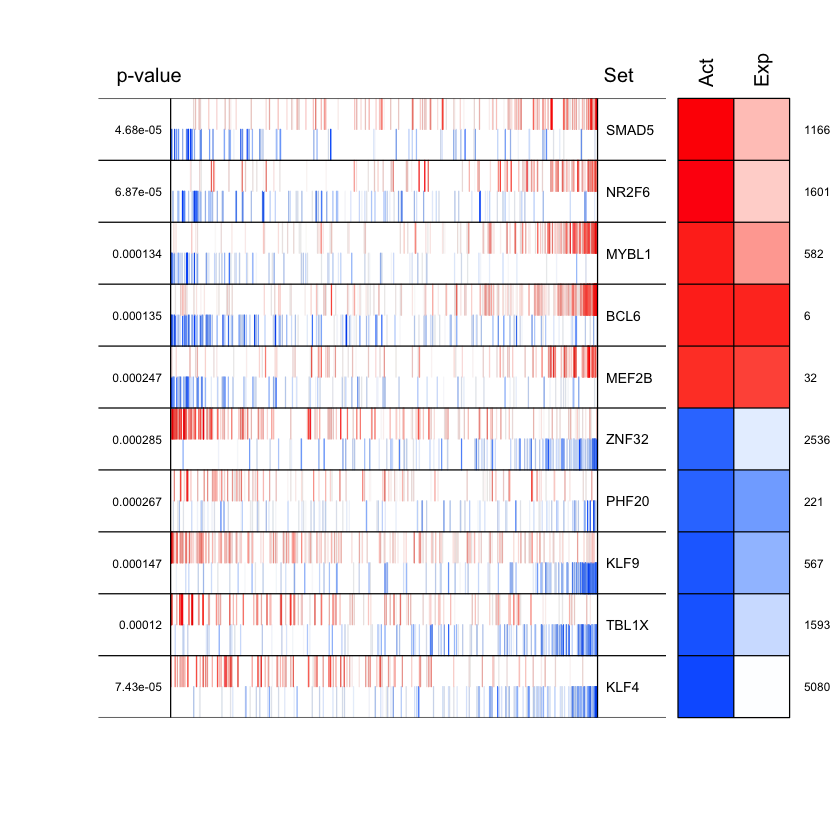

In [19]:
###################################################
### code chunk number 14: viper.Rnw:198-199
###################################################
mrs <- bootstrapmsviper(mrs, "mode")


###################################################
### code chunk number 15: bsmsviper
###################################################
plot(mrs, cex = .7)


,Regulon,Size,NES,p.value,FDR,Ledge
MYBL1,MYBL1,251,4.24,2.20e-05,0.00493,"BCL6, ENTPD1, PDE8A, RAPGEF5, + 140 genes"
NR2F6,NR2F6,223,4.12,3.81e-05,0.00493,"TRIP13, GINS1, TTK, KIF2C, + 100 genes"
MEF2B,MEF2B,228,4.07,4.76e-05,0.00493,"SMARCA4, ENTPD1, RYK, ZMYND11, + 104 genes"
BCL6,BCL6,401,3.95,7.74e-05,0.00577,"KIF14, BUB1, DLGAP4, GINS1, + 217 genes"
E2F2,E2F2,214,3.95,7.92e-05,0.00577,"SMARCA4, MCM7, RYK, CHAF1A, + 87 genes"
TOP2A,TOP2A,749,3.91,9.25e-05,0.00577,"BCL6, PDGFA, KIF14, AP2A2, + 476 genes"
SMAD5,SMAD5,195,3.91,9.35e-05,0.00577,"ENTPD1, PDE8A, RAPGEF5, ZMYND11, + 86 genes"
KLF4,KLF4,255,-4.07,4.65e-05,0.00493,"PSD3, PSMD13, RPL28, CDC123, + 135 genes"
KLF9,KLF9,337,-4.11,4.03e-05,0.00493,"IFIT1, LPAR1, NID1, STOM, + 158 genes"
TBL1X,TBL1X,256,-4.37,1.22e-05,0.00493,"CHUK, NSF, CCT3, C7orf44, + 121 genes"


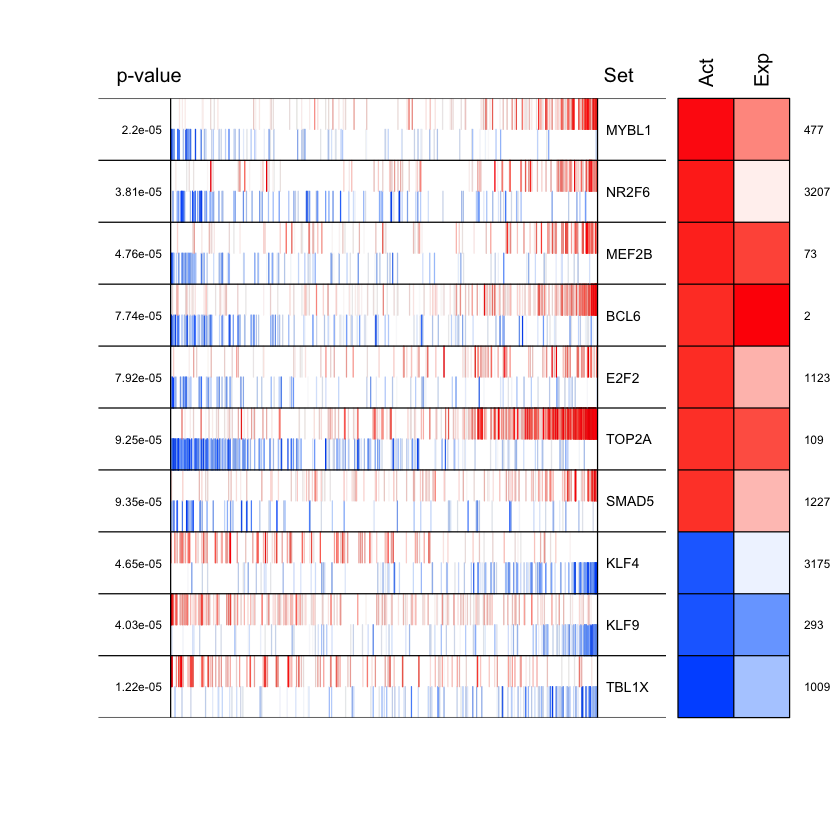

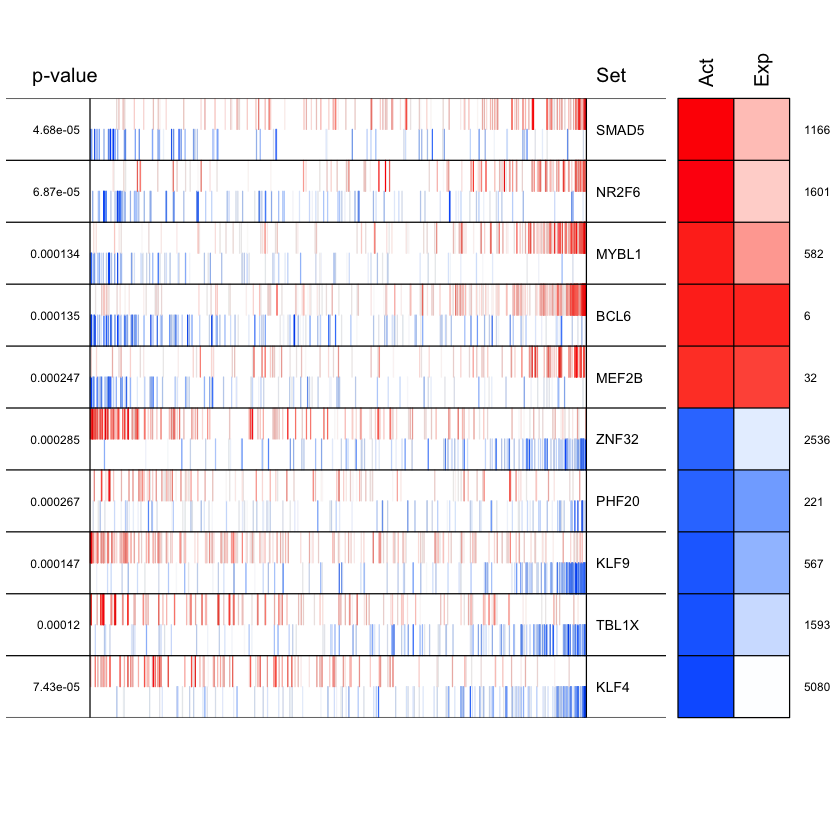

In [12]:





###################################################
### code chunk number 16: viper.Rnw:220-221
###################################################
mrshadow <- shadow(mrs, regulators = 25, verbose = FALSE)


###################################################
### code chunk number 17: viper.Rnw:226-227
###################################################
summary(mrshadow)


###################################################
### code chunk number 18: viper.Rnw:236-237
###################################################
mrs <- msviperCombinatorial(mrs, regulators = 25, verbose = FALSE)


###################################################
### code chunk number 19: viper.Rnw:241-242
###################################################
mrs <- msviperSynergy(mrs, verbose = FALSE)


###################################################
### code chunk number 20: synmsviper
###################################################
summary(mrs)
plot(mrs, 25, cex = .7)


###################################################
### code chunk number 21: viper.Rnw:264-265
###################################################
vpres <- viper(dset, regulon, verbose = FALSE)


###################################################
### code chunk number 22: viper.Rnw:269-270
###################################################
dim(vpres)


###################################################
### code chunk number 23: viper.Rnw:274-277
###################################################
tmp <- rowTtest(vpres, "description", c("CB", "CC"), "N")
data.frame(Gene = rownames(tmp$p.value), t = round(tmp$statistic, 2),
"p-value" = signif(tmp$p.value, 3))[order(tmp$p.value)[1:10], ]


###################################################
### code chunk number 24: viper.Rnw:288-290
###################################################
vpsig <- viperSignature(dset, "description", "N", verbose = FALSE)
vpres <- viper(vpsig, regulon, verbose = FALSE)


###################################################
### code chunk number 25: euviper
###################################################
pos <- pData(vpres)[["description"]] %in% c("M", "CB", "CC")
d1 <- exprs(vpres)[, pos]
colnames(d1) <- pData(vpres)[["description"]][pos]
dd <- dist(t(d1), method = "euclidean")
heatmap(as.matrix(dd), Rowv = as.dendrogram(hclust(dd, method = "average")), symm = T)


###################################################
### code chunk number 26: viper.Rnw:314-315
###################################################
dd <- viperSimilarity(d1)


###################################################
### code chunk number 27: sigviper
###################################################
heatmap(as.matrix(as.dist(dd)), Rowv = as.dendrogram(hclust(as.dist(dd),
method = "average")), symm = T)

